In [1]:
import torch

def euclidean(x:torch.tensor, y:torch.tensor)->torch.tensor:
    return torch.sqrt(torch.pow(x-y,2)).sum()

def cos_sim(x:torch.tensor, y:torch.tensor)->torch.tensor:
    return x.view(-1).dot(y.view(-1)) / (torch.norm(x)*torch.norm(y))

In [2]:
import glob
import os
DATA_DIR = "/home/ljj0512/private/workspace/CV-project/Computer-Vision-Project/train-and-experiment/data/lfw"

file_list = glob.glob(os.path.join(DATA_DIR,"*"))
sorted_list = sorted(file_list, key=lambda x: x.split("/")[-1])
print(sorted_list[0:5])
print()
print(file_list[0:5])
print()
print("the total number of IDs: ",len(file_list))

total_img = 0
more_than_two_img = 0
total_more_than_two_img = 0
data_path_list = []
for file in file_list:
    L = glob.glob(os.path.join(file, "*"))
    if len(L) > 1:
        data_path_list.append(L)
        total_img += len(L)
        total_more_than_two_img += len(L)
        more_than_two_img += 1
        # print(len(L))
        # print(L)
    else:
        total_img += 1

print("the number of images: ",total_img)
print("-"*50)
print("the number of IDs with more than one image: ",more_than_two_img)
print("the number of imagess with more than one image: ",total_more_than_two_img)
print(len(data_path_list))

['/home/ljj0512/private/workspace/CV-project/Computer-Vision-Project/train-and-experiment/data/lfw/AJ_Cook', '/home/ljj0512/private/workspace/CV-project/Computer-Vision-Project/train-and-experiment/data/lfw/AJ_Lamas', '/home/ljj0512/private/workspace/CV-project/Computer-Vision-Project/train-and-experiment/data/lfw/Aaron_Eckhart', '/home/ljj0512/private/workspace/CV-project/Computer-Vision-Project/train-and-experiment/data/lfw/Aaron_Guiel', '/home/ljj0512/private/workspace/CV-project/Computer-Vision-Project/train-and-experiment/data/lfw/Aaron_Patterson']

['/home/ljj0512/private/workspace/CV-project/Computer-Vision-Project/train-and-experiment/data/lfw/Emily_Mortimer', '/home/ljj0512/private/workspace/CV-project/Computer-Vision-Project/train-and-experiment/data/lfw/Paul_Wellstone', '/home/ljj0512/private/workspace/CV-project/Computer-Vision-Project/train-and-experiment/data/lfw/Tom_Gamboa', '/home/ljj0512/private/workspace/CV-project/Computer-Vision-Project/train-and-experiment/data/lfw

In [3]:
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

class Transforms:
    # normalize = [[0.485, 0.456, 0.406], [0.229, 0.224, 0.225]]
    normalize = [[0.5, 0.5, 0.5], [0.5, 0.5, 0.5]]
    test_lfw = transforms.Compose([
        transforms.CenterCrop(112),
        # transforms.Resize((112,112)),
        transforms.ToTensor(),
        transforms.Normalize(*normalize)
    ])

class LFWMatchDataset(Dataset):
    def __init__(self, data_path_list, transform=None):
        self.data_paths = data_path_list
        self.transform = transform
    
    def __len__(self):
        return len(self.data_paths)
    
    def __getitem__(self, index):
        images = []
        for path in self.data_paths[index]:
            if self.transform:
                images.append(self.transform(Image.open(path)))
            else:
                images.append(Image.open(path))
        return {"images":images, "label":torch.tensor(index)}

In [4]:
test_set =  LFWMatchDataset(data_path_list,Transforms.test_lfw)

In [5]:
import torch
from model.iresnet import iresnet18

DIR = "/home/ljj0512/private/workspace/CV-project/Computer-Vision-Project/train-and-experiment/weights/baseline-finetune.pth"
model = iresnet18()
checkpoint = torch.load(DIR)
model.load_state_dict(checkpoint)

<All keys matched successfully>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


3


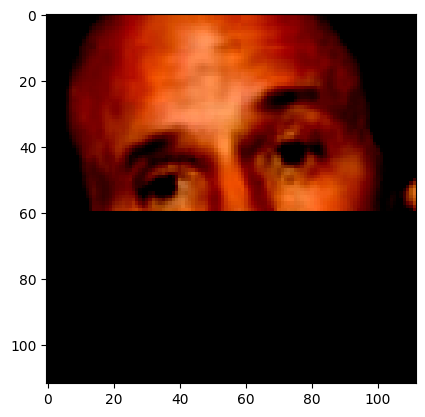

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


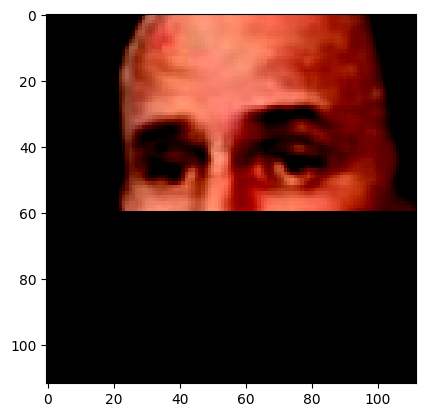

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


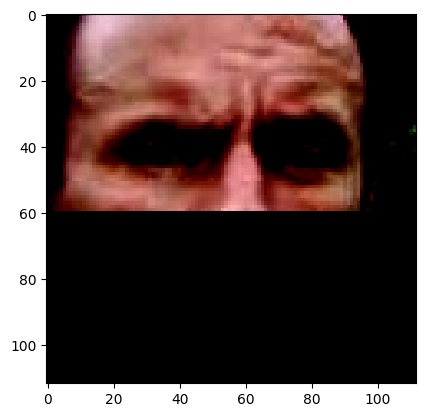

In [6]:
import random 
import matplotlib.pyplot as plt
from dataset import cutout_mask

model.eval()

std_img = test_set[0]["images"]
print(len(std_img))

with torch.no_grad():
    normal_vector_list = []
    for i in range(2):
        img = cutout_mask(std_img[i].unsqueeze(0),p=1.).squeeze(0)
        plt.imshow(img.permute(1,2,0))
        plt.show()
        embvec = model(img.unsqueeze(0))
        normal_vector_list.append(embvec.squeeze(0))
    
    for i in range(2):
        img = cutout_mask(std_img[i].unsqueeze(0),p=1.).squeeze(0)
        plt.imshow(img.permute(1,2,0))
        plt.show()
        embvec = model(img.unsqueeze(0))
        normal_vector_list.append(embvec.squeeze(0))

# plt.imshow(std_img[1].permute(1,2,0))
# plt.show()

# plt.imshow(std_img[2].permute(1,2,0))
# plt.show()

ran = random.randint(0,100)

In [5]:
print(cos_sim(normal_vector_list[0],normal_vector_list[1])) # same
print(cos_sim(normal_vector_list[0],normal_vector_list[2]))
print(cos_sim(normal_vector_list[0],normal_vector_list[3]))
print()
print(cos_sim(normal_vector_list[2],normal_vector_list[3])) # same
print(cos_sim(normal_vector_list[2],normal_vector_list[0]))
print(cos_sim(normal_vector_list[2],normal_vector_list[1]))

tensor(0.6441)
tensor(0.7175)
tensor(0.8553)

tensor(0.7143)
tensor(0.7175)
tensor(0.6187)


In [6]:
print(cos_sim(mask_vector_list[0],mask_vector_list[1])) # same
print(cos_sim(mask_vector_list[0],mask_vector_list[2]))
print(cos_sim(mask_vector_list[0],mask_vector_list[3]))
print()
print(cos_sim(mask_vector_list[2],mask_vector_list[3])) # same
print(cos_sim(mask_vector_list[2],mask_vector_list[0]))
print(cos_sim(mask_vector_list[2],mask_vector_list[1]))

tensor(0.6281)
tensor(0.5621)
tensor(0.7470)

tensor(0.7817)
tensor(0.5621)
tensor(0.6399)


# Trained iresnet18 with arcface and MSMV12 dataset

params: 24,025,600
--------------------------------------------------
(363, 338, 3)


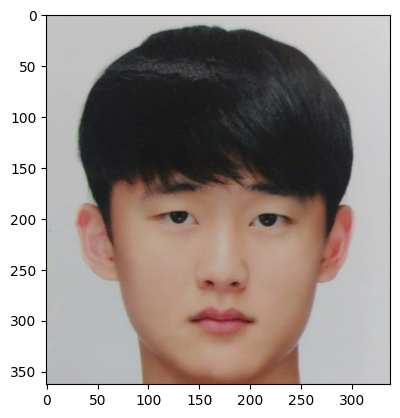

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


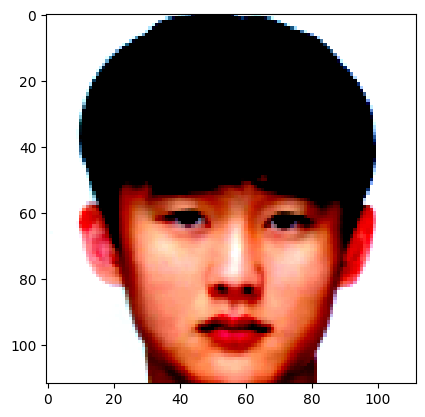

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


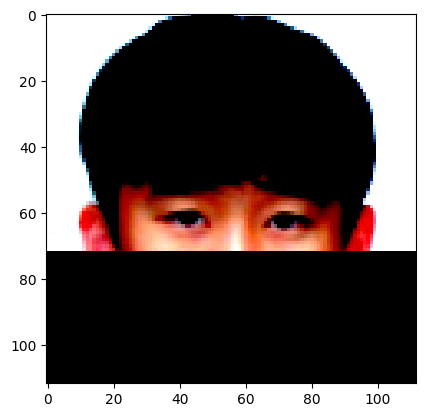

normal image shape: torch.Size([1, 3, 112, 112])
mask image shape: torch.Size([1, 3, 112, 112])
normal image output shape: torch.Size([1, 512])
mask image output shape: torch.Size([1, 512])
--------------------------------------------------
(3088, 2316, 3)


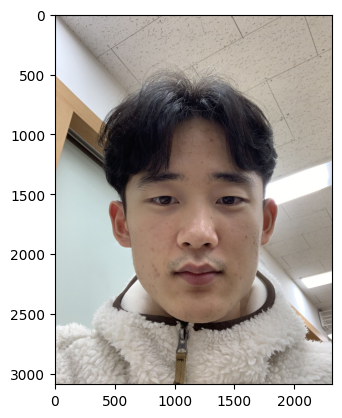

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


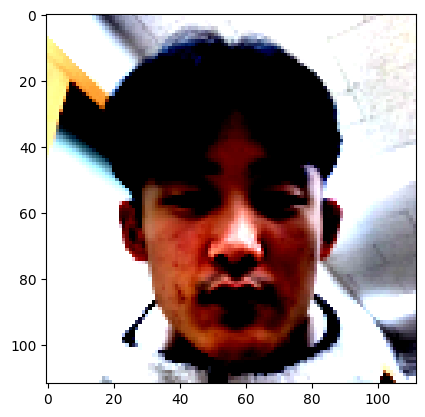

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


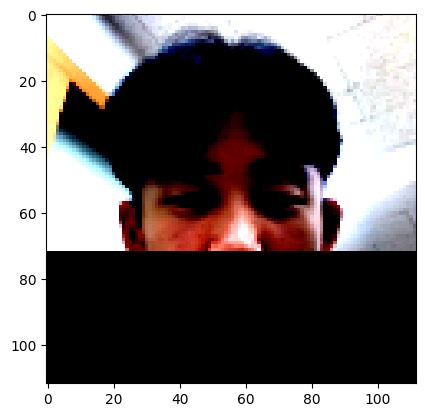

normal image shape: torch.Size([1, 3, 112, 112])
mask image shape: torch.Size([1, 3, 112, 112])
normal image output shape: torch.Size([1, 512])
mask image output shape: torch.Size([1, 512])
--------------------------------------------------
(273, 280, 3)


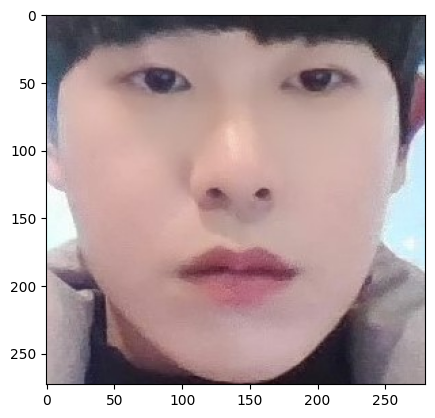

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


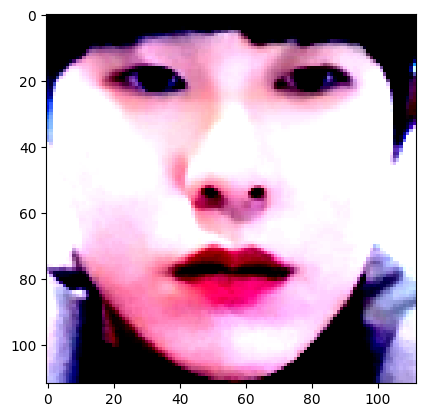

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


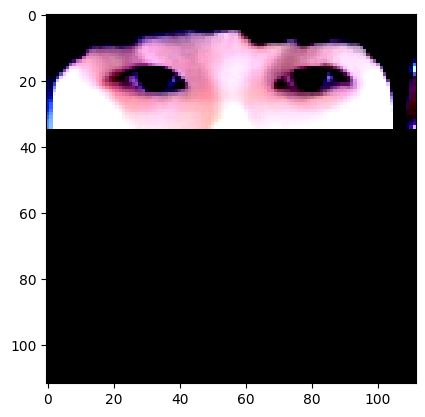

normal image shape: torch.Size([1, 3, 112, 112])
mask image shape: torch.Size([1, 3, 112, 112])
normal image output shape: torch.Size([1, 512])
mask image output shape: torch.Size([1, 512])
--------------------------------------------------
(616, 624, 3)


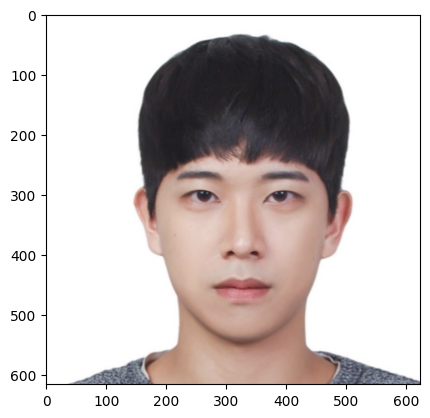

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


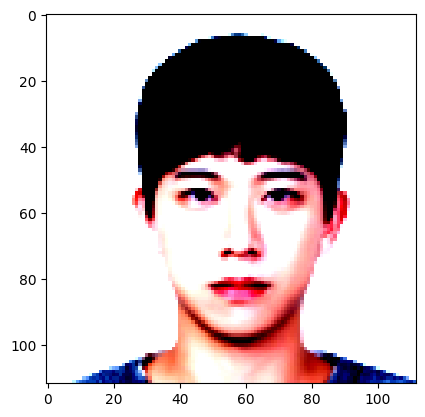

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


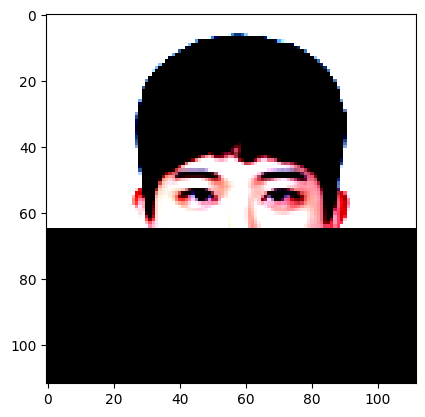

normal image shape: torch.Size([1, 3, 112, 112])
mask image shape: torch.Size([1, 3, 112, 112])
normal image output shape: torch.Size([1, 512])
mask image output shape: torch.Size([1, 512])


In [7]:
import os
import torch
import torch
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from torch import nn
from torchvision import transforms
from model import get_model
from model.iresnet import iresnet18

base_dir = "/home/ljj0512/private/workspace/CV-project/Computer-Vision-Project/"

weights = torch.load(os.path.join(base_dir,"weights/backbone-r18.pth"), map_location=torch.device("cpu"))
model = iresnet18()
model.load_state_dict(weights)
model.eval()
print("params: {:,}".format(sum([p.data.nelement() for p in model.parameters()])))

normal_vector_list = []
mask_vector_list = []
for i in range(4):
    print("-"*50)
    np_img = cv2.imread(os.path.join(base_dir,f"images/{i}.jpg"))
    np_img = cv2.cvtColor(np_img, cv2.COLOR_RGB2BGR)
    # np_img = np.array(img)
    if np_img.shape[-1] > 3:
        print("alpha channel remove")
        np_img = np_img[:,:,0:3]

    print(np_img.shape)
    plt.imshow(np_img)
    plt.show()

    min_size = min(np_img.shape[0:-1])
    image_transforms = transforms.Compose([
            transforms.ToPILImage(),
            transforms.CenterCrop((min_size,min_size)),
            transforms.Resize(size=(112,112)), 
            transforms.ToTensor(),
            transforms.Normalize(
                [0.485, 0.456, 0.406], 
                [0.229, 0.224, 0.225]
            )
        ])

    torch_img = image_transforms(np_img)
    C, H, W = torch_img.size()
    torch_img = torch_img.view(1,C,H,W)
    mask_img = torch_img.clone()
    if i==0 or i==1:
        mask_img.view(C,H,W).permute(1,2,0)[72:113,:,:] = 0.0
    if i==2:
        mask_img.view(C,H,W).permute(1,2,0)[35:113,:,:] = 0.0
    if i==3:
        mask_img.view(C,H,W).permute(1,2,0)[65:113,:,:] = 0.0
    plt.imshow(torch_img.view(C,H,W).permute(1,2,0))
    plt.show()
    plt.imshow(mask_img.view(C,H,W).permute(1,2,0))
    plt.show()
    print("normal image shape:", torch_img.shape)
    print("mask image shape:", mask_img.shape)
    
    with torch.no_grad():
        model.eval()
        output1 = model(torch_img)
        output2 = model(mask_img)
    print("normal image output shape:", output1.shape)
    print("mask image output shape:", output2.shape)
    normal_vector_list.append(output1)
    mask_vector_list.append(output2)

In [8]:
print(cos_sim(normal_vector_list[0],normal_vector_list[1])) # same
print(cos_sim(normal_vector_list[0],normal_vector_list[2]))
print(cos_sim(normal_vector_list[0],normal_vector_list[3]))
print()
print(cos_sim(normal_vector_list[2],normal_vector_list[3])) # same
print(cos_sim(normal_vector_list[2],normal_vector_list[0]))
print(cos_sim(normal_vector_list[2],normal_vector_list[1]))

tensor(0.4156)
tensor(0.0398)
tensor(0.0187)

tensor(0.2052)
tensor(0.0398)
tensor(-0.0621)


In [9]:
print(cos_sim(mask_vector_list[0],mask_vector_list[1])) # same
print(cos_sim(mask_vector_list[0],mask_vector_list[2]))
print(cos_sim(mask_vector_list[0],mask_vector_list[3]))
print()
print(cos_sim(mask_vector_list[2],mask_vector_list[3])) # same
print(cos_sim(mask_vector_list[2],mask_vector_list[0]))
print(cos_sim(mask_vector_list[2],mask_vector_list[1]))

tensor(0.4838)
tensor(0.3670)
tensor(0.3096)

tensor(0.2405)
tensor(0.3670)
tensor(0.2934)


# Trained model with cosface margin loss

params: 24,025,600
--------------------------------------------------
(363, 338, 3)


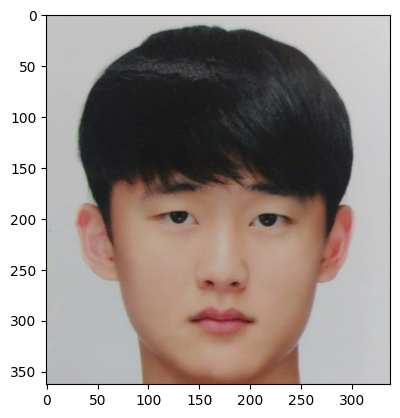

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


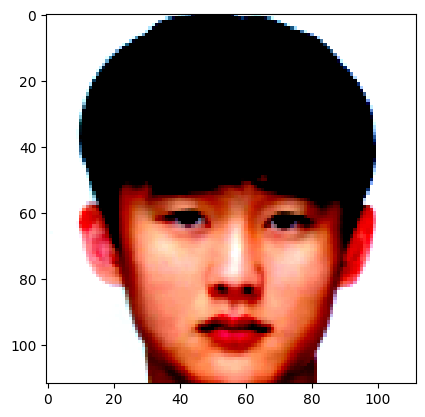

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


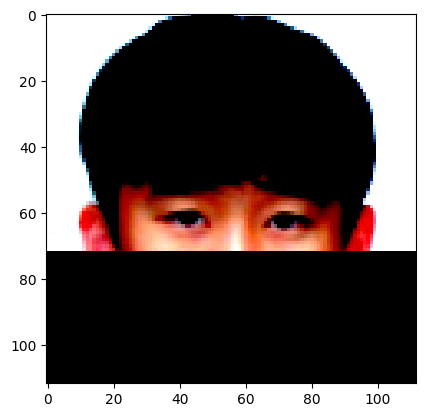

normal image shape: torch.Size([1, 3, 112, 112])
mask image shape: torch.Size([1, 3, 112, 112])
normal image output shape: torch.Size([1, 512])
mask image output shape: torch.Size([1, 512])
--------------------------------------------------
(3088, 2316, 3)


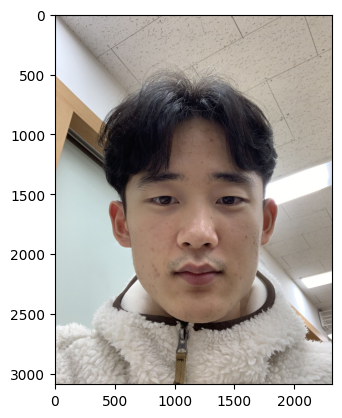

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


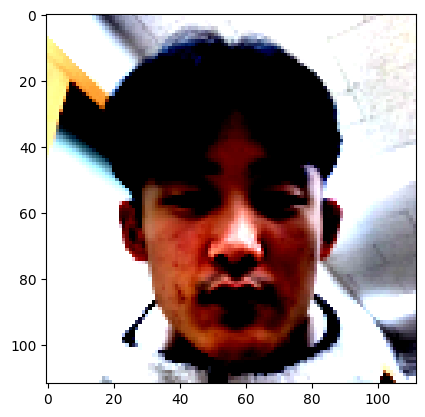

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


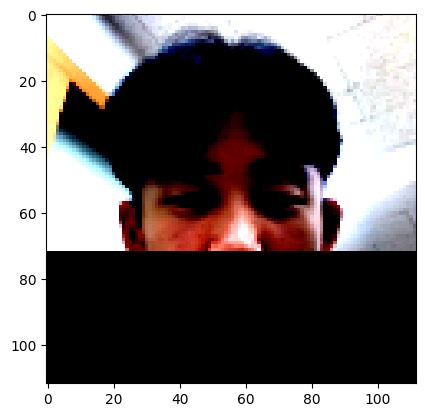

normal image shape: torch.Size([1, 3, 112, 112])
mask image shape: torch.Size([1, 3, 112, 112])
normal image output shape: torch.Size([1, 512])
mask image output shape: torch.Size([1, 512])
--------------------------------------------------
(273, 280, 3)


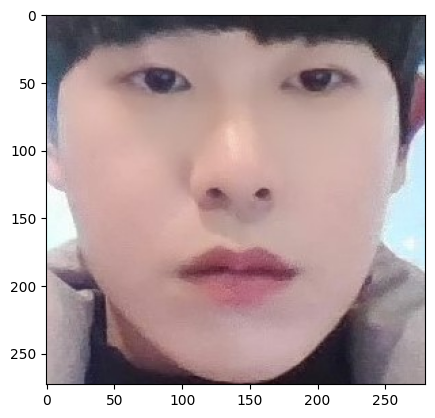

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


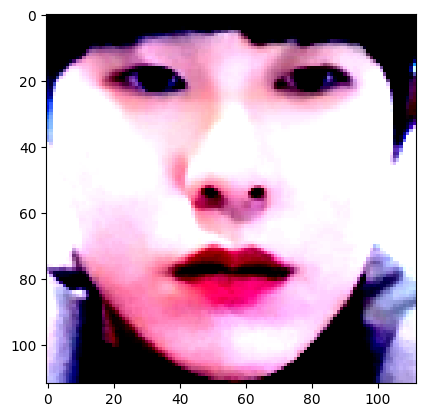

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


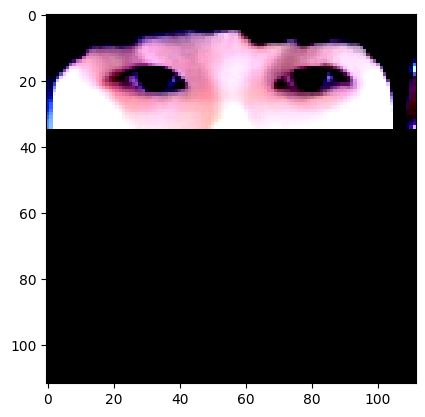

normal image shape: torch.Size([1, 3, 112, 112])
mask image shape: torch.Size([1, 3, 112, 112])
normal image output shape: torch.Size([1, 512])
mask image output shape: torch.Size([1, 512])
--------------------------------------------------
(616, 624, 3)


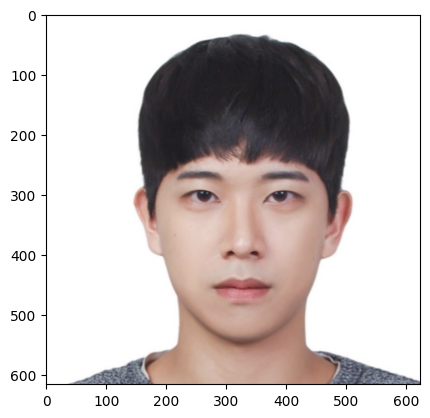

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


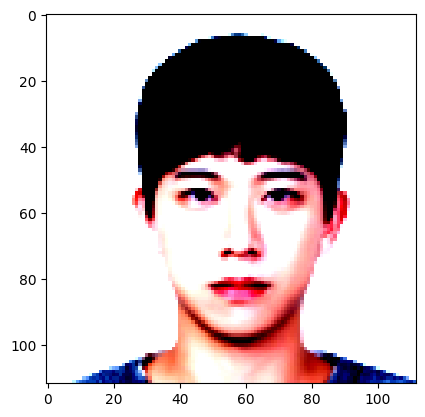

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


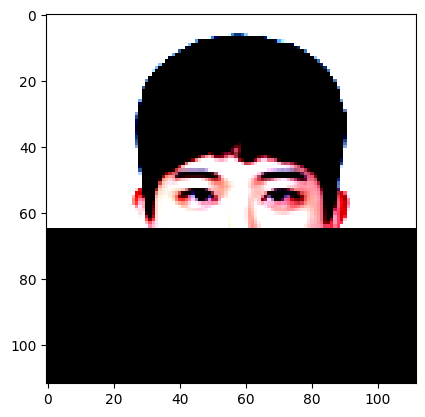

normal image shape: torch.Size([1, 3, 112, 112])
mask image shape: torch.Size([1, 3, 112, 112])
normal image output shape: torch.Size([1, 512])
mask image output shape: torch.Size([1, 512])


In [10]:
import os
import torch
import torch
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from torch import nn
from torchvision import transforms
from model import get_model
from model.iresnet import iresnet18

base_dir = "/home/ljj0512/private/workspace/CV-project/Computer-Vision-Project/"

weights = torch.load(os.path.join(base_dir,"weights/backbone-every-margin-loss-r18.pth"), map_location=torch.device("cpu"))
model = iresnet18()
model.load_state_dict(weights)
model.eval()
print("params: {:,}".format(sum([p.data.nelement() for p in model.parameters()])))

normal_vector_list = []
mask_vector_list = []
for i in range(4):
    print("-"*50)
    np_img = cv2.imread(os.path.join(base_dir,f"images/{i}.jpg"))
    np_img = cv2.cvtColor(np_img, cv2.COLOR_RGB2BGR)
    # np_img = np.array(img)
    if np_img.shape[-1] > 3:
        print("alpha channel remove")
        np_img = np_img[:,:,0:3]

    print(np_img.shape)
    plt.imshow(np_img)
    plt.show()

    min_size = min(np_img.shape[0:-1])
    image_transforms = transforms.Compose([
            transforms.ToPILImage(),
            transforms.CenterCrop((min_size,min_size)),
            transforms.Resize(size=(112,112)), 
            transforms.ToTensor(),
            transforms.Normalize(
                [0.485, 0.456, 0.406], 
                [0.229, 0.224, 0.225]
            )
        ])

    torch_img = image_transforms(np_img)
    C, H, W = torch_img.size()
    torch_img = torch_img.view(1,C,H,W)
    mask_img = torch_img.clone()
    if i==0 or i==1:
        mask_img.view(C,H,W).permute(1,2,0)[72:113,:,:] = 0.0
    if i==2:
        mask_img.view(C,H,W).permute(1,2,0)[35:113,:,:] = 0.0
    if i==3:
        mask_img.view(C,H,W).permute(1,2,0)[65:113,:,:] = 0.0
    plt.imshow(torch_img.view(C,H,W).permute(1,2,0))
    plt.show()
    plt.imshow(mask_img.view(C,H,W).permute(1,2,0))
    plt.show()
    print("normal image shape:", torch_img.shape)
    print("mask image shape:", mask_img.shape)
    
    with torch.no_grad():
        model.eval()
        output1 = model(torch_img)
        output2 = model(mask_img)
    print("normal image output shape:", output1.shape)
    print("mask image output shape:", output2.shape)
    normal_vector_list.append(output1)
    mask_vector_list.append(output2)

In [11]:
print(cos_sim(normal_vector_list[0],normal_vector_list[1])) # same
print(cos_sim(normal_vector_list[0],normal_vector_list[2]))
print(cos_sim(normal_vector_list[0],normal_vector_list[3]))
print()
print(cos_sim(normal_vector_list[2],normal_vector_list[3])) # same
print(cos_sim(normal_vector_list[2],normal_vector_list[0]))
print(cos_sim(normal_vector_list[2],normal_vector_list[1]))

tensor(0.4175)
tensor(-0.0315)
tensor(0.1434)

tensor(0.1453)
tensor(-0.0315)
tensor(0.0754)


In [12]:
print(cos_sim(mask_vector_list[0],mask_vector_list[1])) # same
print(cos_sim(mask_vector_list[0],mask_vector_list[2]))
print(cos_sim(mask_vector_list[0],mask_vector_list[3]))
print()
print(cos_sim(mask_vector_list[2],mask_vector_list[3])) # same
print(cos_sim(mask_vector_list[2],mask_vector_list[0]))
print(cos_sim(mask_vector_list[2],mask_vector_list[1]))

tensor(0.4064)
tensor(0.2117)
tensor(0.3117)

tensor(0.3790)
tensor(0.2117)
tensor(0.2802)
